# Required Imports

In [91]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas.api.types import is_string_dtype,is_numeric_dtype
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

# Importing CSV files

In [72]:
test = pd.read_csv('C:/Users/Home/Desktop/Data science (Summer)/Assignments/Assignment No 3/test.csv/test.csv')
train  =pd.read_csv('C:/Users/Home/Desktop/Data science (Summer)/Assignments/Assignment No 3/train.csv/train.csv')

In [73]:
print(train.shape)
train.head(5)

(550068, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [74]:
print(test.shape)
test.head(5)

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Method 1: DATA PREPROCESSING ON TRAINING SET

##  Converting Object to Category

In [75]:

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python gives the keys along with its values
        if is_string_dtype(q): #p - key, q - valu
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df

In [76]:
train = str_to_cat(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null category
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null int64
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: category(5), float64(2), int64(5)
memory usage: 32.7 MB


User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64


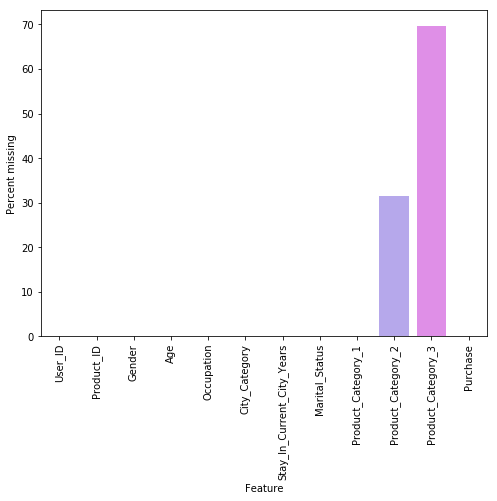

In [77]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = train.isnull().sum()/len(train)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=90)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)
print(train.isnull().sum()/len(train)*100)

In [78]:
train2 = train.drop("Product_Category_3",axis = 1)
print(train2.shape)
train2.head(2)

(550068, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200


In [79]:
print(train2.Product_Category_2.min())
print(train2.Product_Category_2.max())
avg_train = train2.Product_Category_2.mean()
median_train = train2.Product_Category_2.median()
print(avg_train)
print(median_train)

2.0
18.0
9.842329251122386
9.0


# Replacing Null Values with the Mean Value

In [80]:

train2['Product_Category_2'].fillna(avg_train, inplace=True)
print(train2.isnull().sum()/len(train2['Product_Category_2'])*100)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Purchase                      0.0
dtype: float64


In [81]:
train2.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200


# Dropping Product and Uer ID since they wont be used for analyzes

In [82]:

train3 = train2.drop("User_ID",axis = 1)
train4 = train3.drop("Product_ID",axis = 1)
train4.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.842329,8370
1,F,0-17,10,A,2,0,1,6.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,1422
3,F,0-17,10,A,2,0,12,14.000000,1057
4,M,55+,16,C,4+,0,8,9.842329,7969


In [83]:
for col_name in ['Gender', 'Age', 'Occupation', 'City_Category','Marital_Status','Product_Category_1']:
    print(sorted(train[col_name].unique()))

['F', 'M']
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
['A', 'B', 'C']
[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


# Imputing

In [84]:

def mydf_to_nums(train4, feature, null_status):
    if not is_numeric_dtype(feature):
        train4[null_status] = feature.cat.codes + 1
        
def mydf_imputer(train4, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            train4[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.mean()
            train4[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(train4, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in train4.items(): 
        null_table = mydf_imputer(train4, q, p, null_table)
    for p,q in train4.items(): 
        mydf_to_nums(train4, q, p)
    train4 = pd.get_dummies(train4, dummy_na = True)
    res = [train4, null_table]
    return res

In [85]:
train5,my_table = mydf_preprocessor(train4,null_table = None)
train5.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,1,10,1,3,0,3,9.842329,8370
1,1,1,10,1,3,0,1,6.000000,15200
2,1,1,10,1,3,0,12,9.842329,1422
3,1,1,10,1,3,0,12,14.000000,1057
4,2,7,16,3,5,0,8,9.842329,7969


In [86]:
print(train5.shape)

(550068, 9)


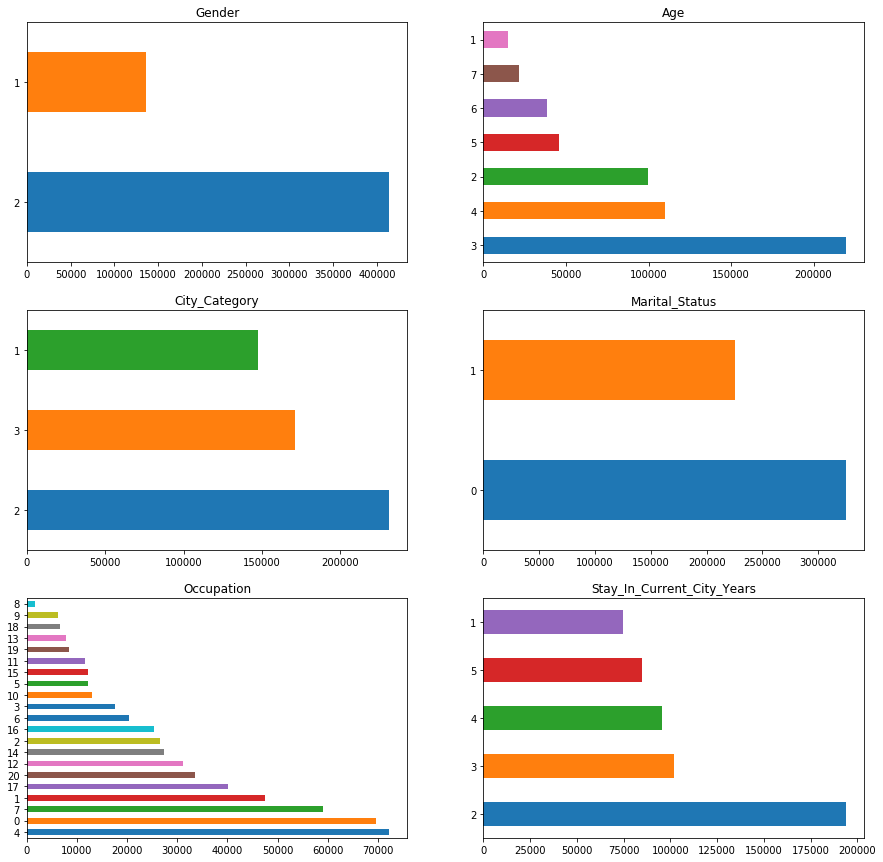

In [87]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

train5['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
train5['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
train5['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
train5['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
train5['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
train5['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')

In [88]:
def mydf_splitter(train5,num_rows):
    return train5[:num_rows].copy(),train5[num_rows:]


final_train,valid = mydf_splitter(train5,467557)

print(final_train.shape,valid.shape)

(467557, 9) (82511, 9)


In [19]:
Y_train = final_train["Purchase"]
X_train = final_train.drop(["Purchase"],axis = 1)
print(X_train.shape,Y_train.shape)

(467557, 8) (467557,)


In [20]:
Y_valid = valid["Purchase"]
X_valid = valid.drop(["Purchase"],axis = 1)
print(X_valid.shape,Y_valid.shape)

(82511, 8) (82511,)


In [21]:
# Build and compile a deep learning model
model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(4, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform'))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  """
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="uniform")`
  
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Ker

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score= list()
accuracy_list=list()
epoch=list()
batch= list()

In [23]:
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=3, batch_size=1000)
scores = model.evaluate(X_valid, Y_valid)
score.append(scores)
print ("Accuracy: %.2f%%" %(scores[1]*100))

Instructions for updating:
Use tf.cast instead.


C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 467557 samples, validate on 82511 samples
Epoch 1/3
467557/467557 [==============================] - 4s 9us/step - loss: -99508.3536 - acc: 0.0000e+00 - val_loss: -141783.3814 - val_acc: 0.0000e+00
Epoch 2/3
467557/467557 [==============================] - 2s 4us/step - loss: -148701.1648 - acc: 0.0000e+00 - val_loss: -141826.1428 - val_acc: 0.0000e+00
Epoch 3/3
82511/82511 [==============================] - 2s 21us/step
Accuracy: 0.00%


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [25]:
def str_to_cat(my_df):
    for p,q in test.items(): #my_df.items() is a generator in Python gives the keys along with its values
        if is_string_dtype(q): #p - key, q - valu
            test[p] = q.astype('category').cat.as_ordered()
    return my_df

In [26]:
test = str_to_cat(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null category
Gender                        233599 non-null category
Age                           233599 non-null category
Occupation                    233599 non-null int64
City_Category                 233599 non-null category
Stay_In_Current_City_Years    233599 non-null category
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: category(5), float64(2), int64(4)
memory usage: 12.2 MB


User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64


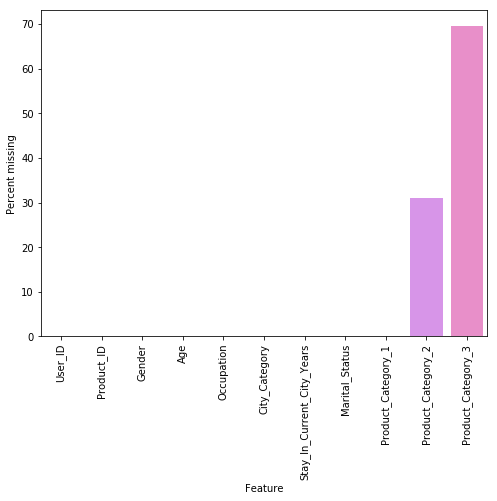

In [27]:
null_vals = test.isnull().sum()/len(test)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=90)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)
print(test.isnull().sum()/len(test)*100)

In [28]:
test2 = test.drop("Product_Category_3",axis = 1)
print(test.shape)
test2.head(2)

(233599, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0


In [29]:
print(test2.Product_Category_2.min())
print(test2.Product_Category_2.max())
avg_test = test2.Product_Category_2.mean()
median_test = test2.Product_Category_2.median()
print(avg_test)
print(median_test)

2.0
18.0
9.849586059346997
9.0


# Replacing Null Values with the Mean Value

In [30]:
test2['Product_Category_2'].fillna(avg_test, inplace=True)
print(test2.isnull().sum()/len(test2['Product_Category_2'])*100)

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
dtype: float64


In [31]:
test2.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0


In [32]:
# Dropping Product and Uer ID since they wont be used for analyzes
test3 = test2.drop("User_ID",axis = 1)
test4 = test3.drop("Product_ID",axis = 1)
test4.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,M,46-50,7,B,2,1,1,11.0
1,M,26-35,17,C,0,0,3,5.0
2,F,36-45,1,B,4+,1,5,14.0
3,F,36-45,1,B,4+,1,4,9.0
4,F,26-35,1,C,1,0,4,5.0


In [33]:
for col_name in ['Gender', 'Age', 'Occupation', 'City_Category','Marital_Status','Product_Category_1']:
    print(sorted(test4[col_name].unique()))

['F', 'M']
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
['A', 'B', 'C']
[0, 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [34]:
def mydf_to_nums(test4, feature, null_status):
    if not is_numeric_dtype(feature):
        test4[null_status] = feature.cat.codes + 1
        
def mydf_imputer(test4, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            test4[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.mean()
            test4[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table

def mydf_preprocessor(test4, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in test4.items(): 
        null_table = mydf_imputer(test4, q, p, null_table)
    for p,q in test4.items(): 
        mydf_to_nums(test4, q, p)
    test4 = pd.get_dummies(test4, dummy_na = True)
    res = [test4, null_table]
    return res



In [35]:
test5, my_table = mydf_preprocessor(test4,null_table = None)
test5.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,2,5,7,2,3,1,1,11.0
1,2,3,17,3,1,0,3,5.0
2,1,4,1,2,5,1,5,14.0
3,1,4,1,2,5,1,4,9.0
4,1,3,1,3,2,0,4,5.0


In [36]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=10, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=10, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [37]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=100, batch_size=5)

NameError: name 'X_test' is not defined

# Method :2

# Function to split the training data 

In [39]:
def mydf_splitter(train,num_rows):
    return train[:num_rows].copy(),train[num_rows:]

In [40]:
train_valid,train_test = mydf_splitter(train,385048)

print(train_valid.shape,train_test.shape)

(385048, 12) (165020, 12)


# Missing value Analysis

In [41]:
import missingno

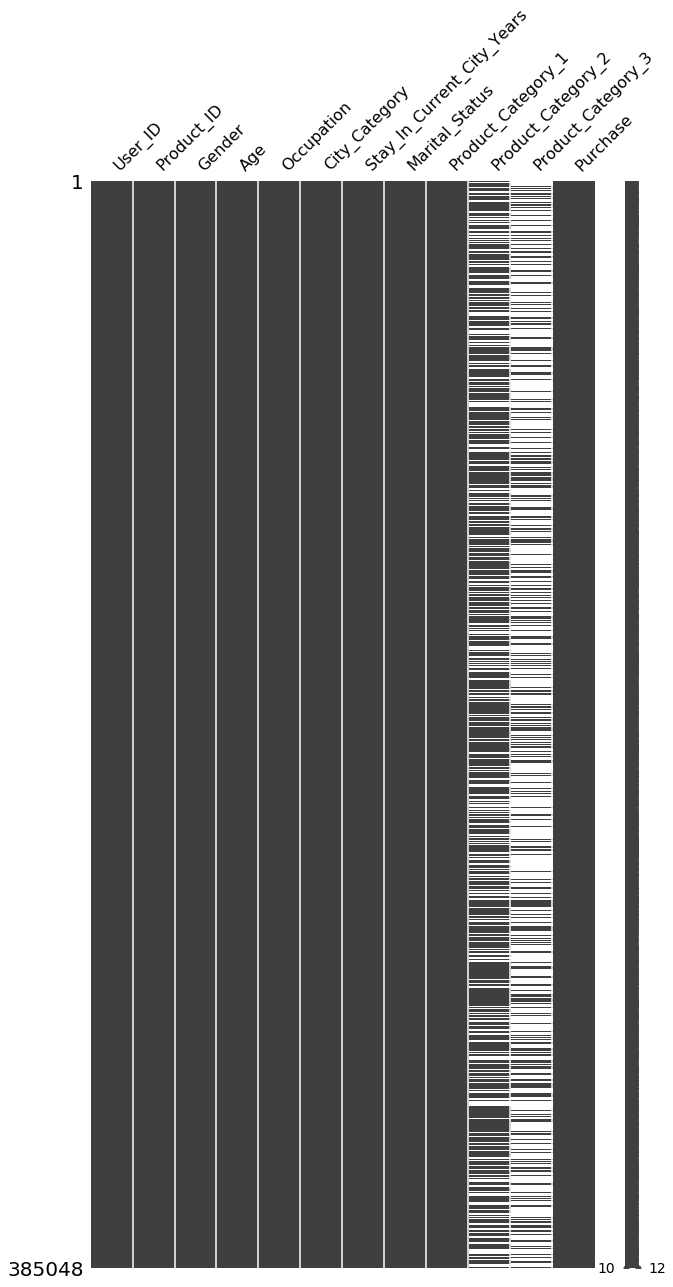

In [42]:
missingno.matrix(train_valid, figsize = (10,20))

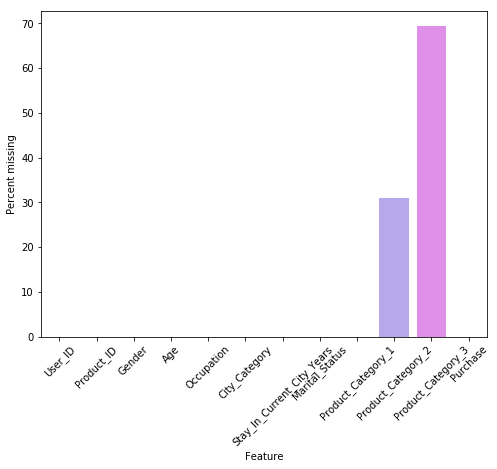

In [43]:
null_vals = train_valid.isnull().sum()/len(train_valid)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

# Dropping the Product_Category_3 column from data frame

In [44]:
train_valid_2 = train_valid.drop("Product_Category_3",axis = 1)
print(train_valid_2.shape)
train_valid_2.head(2)

(385048, 11)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200


In [45]:
train_valid_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385048 entries, 0 to 385047
Data columns (total 11 columns):
User_ID                       385048 non-null int64
Product_ID                    385048 non-null category
Gender                        385048 non-null category
Age                           385048 non-null category
Occupation                    385048 non-null int64
City_Category                 385048 non-null category
Stay_In_Current_City_Years    385048 non-null category
Marital_Status                385048 non-null int64
Product_Category_1            385048 non-null int64
Product_Category_2            265619 non-null float64
Purchase                      385048 non-null int64
dtypes: category(5), float64(1), int64(5)
memory usage: 20.0 MB


# Converting the data into desirable data type.

In [46]:
def str_to_cat(train):
    for p,q in train.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            train[p] = q.astype('category').cat.as_ordered()
    return train

In [47]:
train_valid_3 = str_to_cat(train_valid_2)

In [48]:
train_valid_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385048 entries, 0 to 385047
Data columns (total 11 columns):
User_ID                       385048 non-null int64
Product_ID                    385048 non-null category
Gender                        385048 non-null category
Age                           385048 non-null category
Occupation                    385048 non-null int64
City_Category                 385048 non-null category
Stay_In_Current_City_Years    385048 non-null category
Marital_Status                385048 non-null int64
Product_Category_1            385048 non-null int64
Product_Category_2            265619 non-null float64
Purchase                      385048 non-null int64
dtypes: category(5), float64(1), int64(5)
memory usage: 20.0 MB


# Defining required functions 

In [49]:
def mydf_to_nums(train, feature, null_status):
    if not is_numeric_dtype(feature):
        train[null_status] = feature.cat.codes + 1


In [50]:
def mydf_imputer(train, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            train[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            train[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

In [51]:
def mydf_preprocessor(train, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in train.items(): 
        null_table = mydf_imputer(train, q, p, null_table)
    for p,q in train.items(): 
        mydf_to_nums(train, q, p)
    my_df = pd.get_dummies(train, dummy_na = True)
    res = [train, null_table]
    return res

In [52]:
train_valid_4,my_table = mydf_preprocessor(train_valid_3,null_table = None)

my_table

{'Product_Category_2': 9.0}

In [53]:
train_valid_4.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Product_Category_2_na
0,1000001,673,1,1,10,1,3,0,3,9.0,8370,True
1,1000001,2377,1,1,10,1,3,0,1,6.0,15200,False
2,1000001,853,1,1,10,1,3,0,12,9.0,1422,True


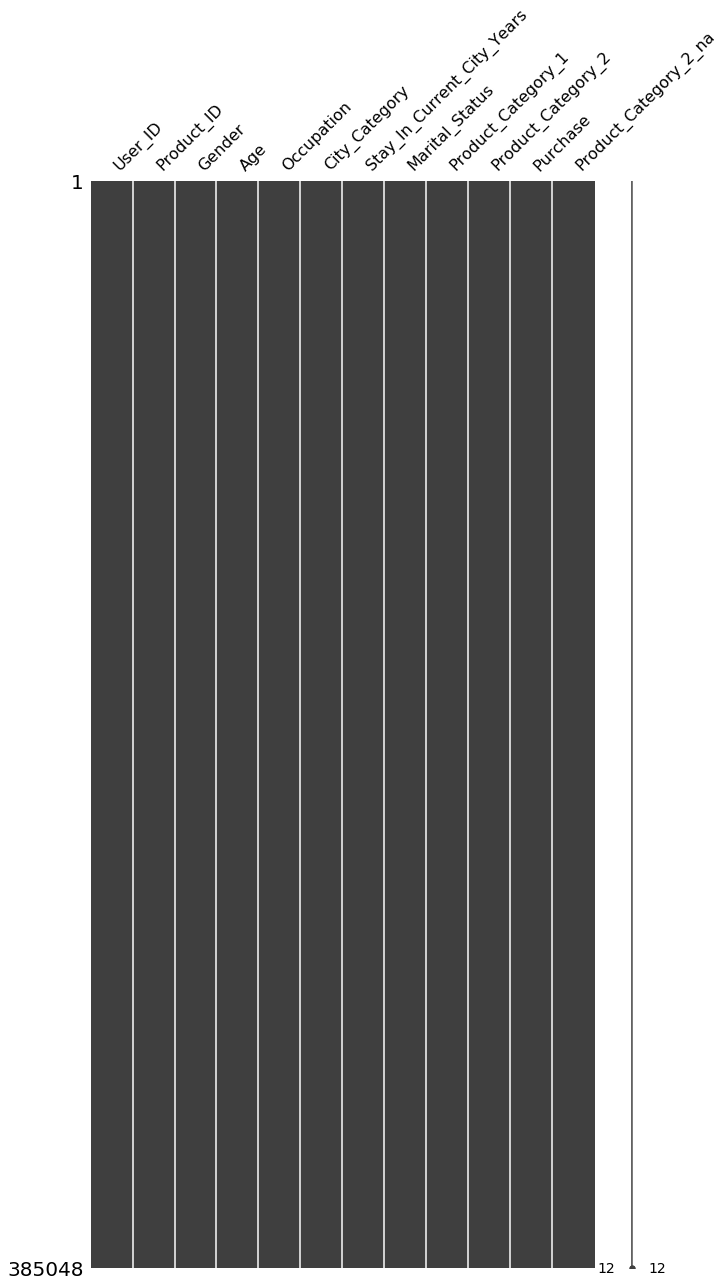

In [54]:
missingno.matrix(train_valid_4, figsize = (10,20))

In [55]:
#Separate out X and Y

X = train_valid_4.iloc[:, :10]
Y = train_valid_4.iloc[:, 10:11]

In [56]:
# Train- Test Split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.30, random_state=1)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(269533, 10) (115515, 10) (269533, 1) (115515, 1)


In [57]:
X_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
82890,1000816,933,2,5,0,3,3,0,13,16.0
144993,1004351,464,2,3,12,3,3,0,1,5.0
112353,1005333,135,1,3,7,1,5,0,5,9.0
28355,1004329,2390,1,3,14,2,1,1,16,9.0
71331,1004957,2476,2,3,2,1,2,1,5,9.0


In [58]:
X_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
151527,1005420,3599,1,1,19,2,5,0,2,3.0
74024,1005402,600,1,3,0,3,5,1,8,16.0
344567,1005039,1990,1,4,4,2,3,1,15,16.0
309593,1005717,1065,2,3,0,2,4,1,8,9.0
213744,1003025,971,1,4,0,3,2,0,5,9.0


In [59]:
Y_train.head()

,Purchase
82890,569
144993,8318
112353,7027
28355,16200
71331,5429


In [60]:
Y_test.head()

,Purchase
151527,10008
74024,7889
344567,4635
309593,9906
213744,5266


# Build and compile a deep learning model

In [61]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=10, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=10, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


# Compile the DNN

In [62]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [90]:
# Fit the DNN with your train data

history= model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch=1, batch_size=5)








Train on 269533 samples, validate on 115515 samples
Epoch 1/1
   315/269533 [..............................] - ETA: 2:15 - loss: -151667.9028 - acc: 0.0000e+00

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


269533/269533 [==============================] - 99s 368us/step - loss: -148529.8966 - acc: 0.0000e+00 - val_loss: -148978.7169 - val_acc: 0.0000e+00


In [70]:

scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

115515/115515 [==============================] - 2s 20us/step
Accuracy: 0.00%


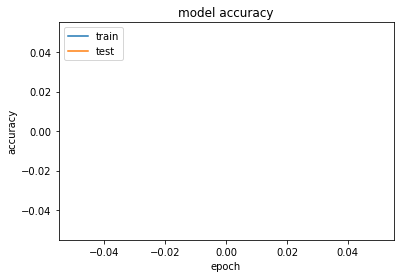

In [92]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

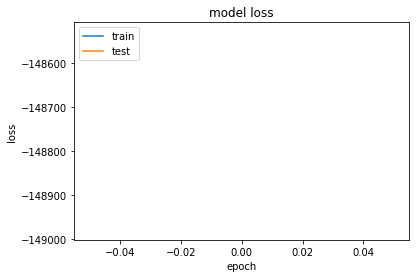

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# AUC and ROC curves

In [94]:
predict_probability = model.predict_proba(X_test)[:]

In [ ]:
#Plotting ROC Curve and AUC value

from sklearn.metrics import roc_curve, auc

FPR, TPR, threshold = roc_curve(Y_test, predict_probability)

plt.figure(figsize=(12,6))
plt.plot(FPR,TPR)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1], [0,1], color = 'yellow', linewidth = 2.2)
plt.plot(FPR,TPR, linewidth = 2.2, label = 'AUC = %.2f' % auc(FPR,TPR))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.grid(True)
plt.legend(loc = "center right")

# Conclusion:
DNN algorithm for prediction problem is studied

# Citations:
Dataset & Kernels: https://www.kaggle.com/sdolezel/black-friday

Video Reference 1: https://www.youtube.com/results?search_query=auc+roc+curve+code+in+python+

Video Reference 2:https://www.youtube.com/watch?v=bRaZkqknCVI

# License:
Copyright 2019 Nikhil Kashid

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.